<a href="https://colab.research.google.com/github/Tempest-Sama/Projects/blob/main/Machine_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries here as my first step
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the CSV file
data = pd.read_csv('/content/Machine Data.csv')

In [ ]:
# Displaying the basic information like table rows
data.info()
data.head()

# Checking for any missing values
print("Missing Values:\n", data.isnull().sum())

# using describe to check all the information
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
Missing Values:
 footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4

In [ ]:
# Here Checking class distribution for the target variable
class_dist = data['fail'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_dist)


Class Distribution (%):
 fail
0    58.368644
1    41.631356
Name: proportion, dtype: float64


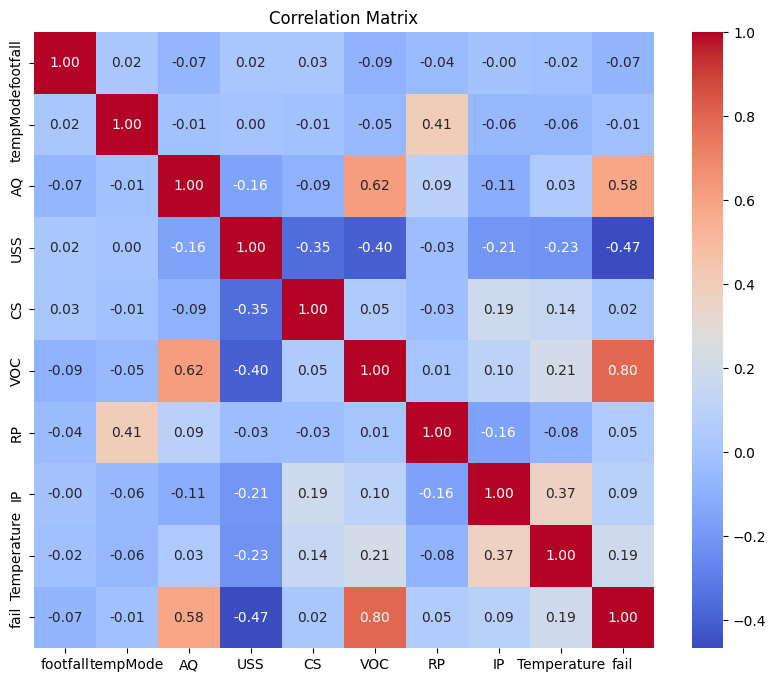

Correlation with 'fail':
 fail           1.000000
VOC            0.797329
AQ             0.583238
Temperature    0.190257
IP             0.085624
RP             0.053668
CS             0.018855
tempMode      -0.014462
footfall      -0.073066
USS           -0.466574
Name: fail, dtype: float64


In [ ]:
# Here Computing and ploting the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Checking correlations with the target variable 'fail'
fail_correlation = correlation_matrix['fail'].sort_values(ascending=False)
print("Correlation with 'fail':\n", fail_correlation)



<ipython-input-6-3cc90c612b6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='VOC', data=data, palette="Set2")
<ipython-input-6-3cc90c612b6d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='AQ', data=data, palette="Set3")
<ipython-input-6-3cc90c612b6d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='USS', data=data, palette="Set1")
<ipython-input-6-3cc90c612b6d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

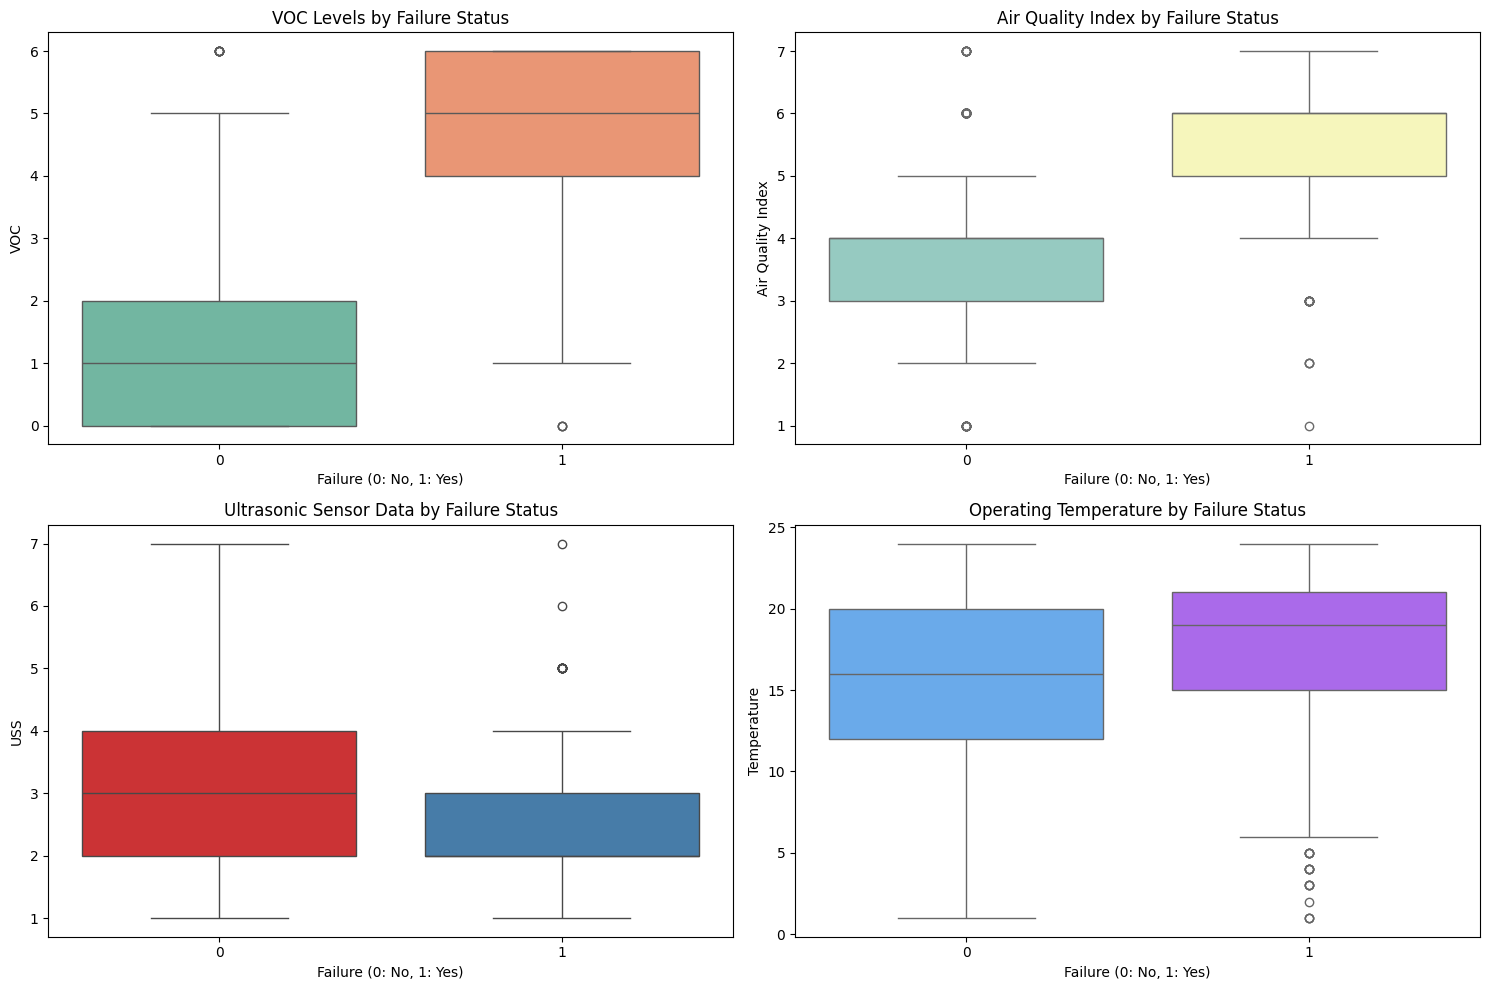

In [ ]:
# Using Box plots for relationships between key features and 'fail'
plt.figure(figsize=(15, 10))

# VOC vs fail
plt.subplot(2, 2, 1)
sns.boxplot(x='fail', y='VOC', data=data, palette="Set2")
plt.title('VOC Levels by Failure Status')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('VOC')

# AQ vs fail
plt.subplot(2, 2, 2)
sns.boxplot(x='fail', y='AQ', data=data, palette="Set3")
plt.title('Air Quality Index by Failure Status')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('Air Quality Index')

# USS vs fail
plt.subplot(2, 2, 3)
sns.boxplot(x='fail', y='USS', data=data, palette="Set1")
plt.title('Ultrasonic Sensor Data by Failure Status')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('USS')

# Temperature vs fail
plt.subplot(2, 2, 4)
sns.boxplot(x='fail', y='Temperature', data=data, palette="cool")
plt.title('Operating Temperature by Failure Status')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numeric columns (if needed)
features_to_scale = ['footfall', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Verify scaling
print(data.head())

   footfall  tempMode        AQ       USS        CS       VOC        RP  \
0 -0.283153         7  1.860497 -1.402480  0.477610  1.389813 -0.672788   
1 -0.107558         1 -0.921775  0.043660 -0.310613 -0.810763 -1.647540   
2 -0.254504         7 -1.617343 -0.679410  0.477610 -0.810763 -1.403852   
3 -0.206446         4 -0.921775  0.766730 -0.310613 -0.810763 -1.160164   
4  0.308326         7  0.469361  2.212869 -1.098836 -1.250878  1.276716   

         IP  Temperature  fail  
0 -0.979504    -2.567407     1  
1 -0.353894    -2.567407     0  
2  0.897327    -2.567407     0  
3  0.897327    -2.567407     0  
4  0.897327    -2.567407     0  


In [ ]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = data.drop(columns=['fail'])
y = data['fail']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (755, 9)
Testing set size: (189, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189

Confusion Matrix:
 [[87 15]
 [10 77]]
ROC-AUC Score: 0.9444444444444444


Feature Importances:
        Feature  Importance
5          VOC    0.431135
2           AQ    0.189150
3          USS    0.132977
4           CS    0.063121
0     footfall    0.048522
6           RP    0.045793
8  Temperature    0.042877
7           IP    0.024642
1     tempMode    0.021782


<ipython-input-10-d87f22377fd6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


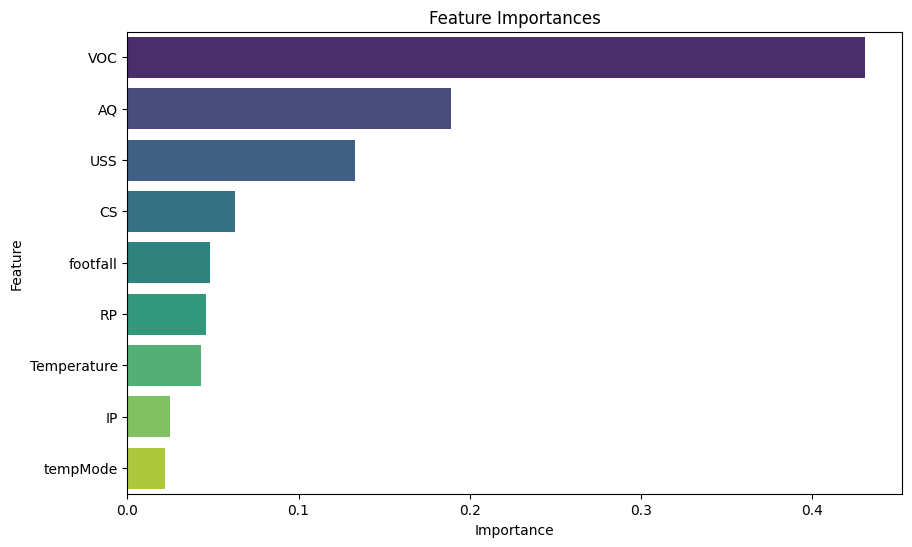

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importances')
plt.show()


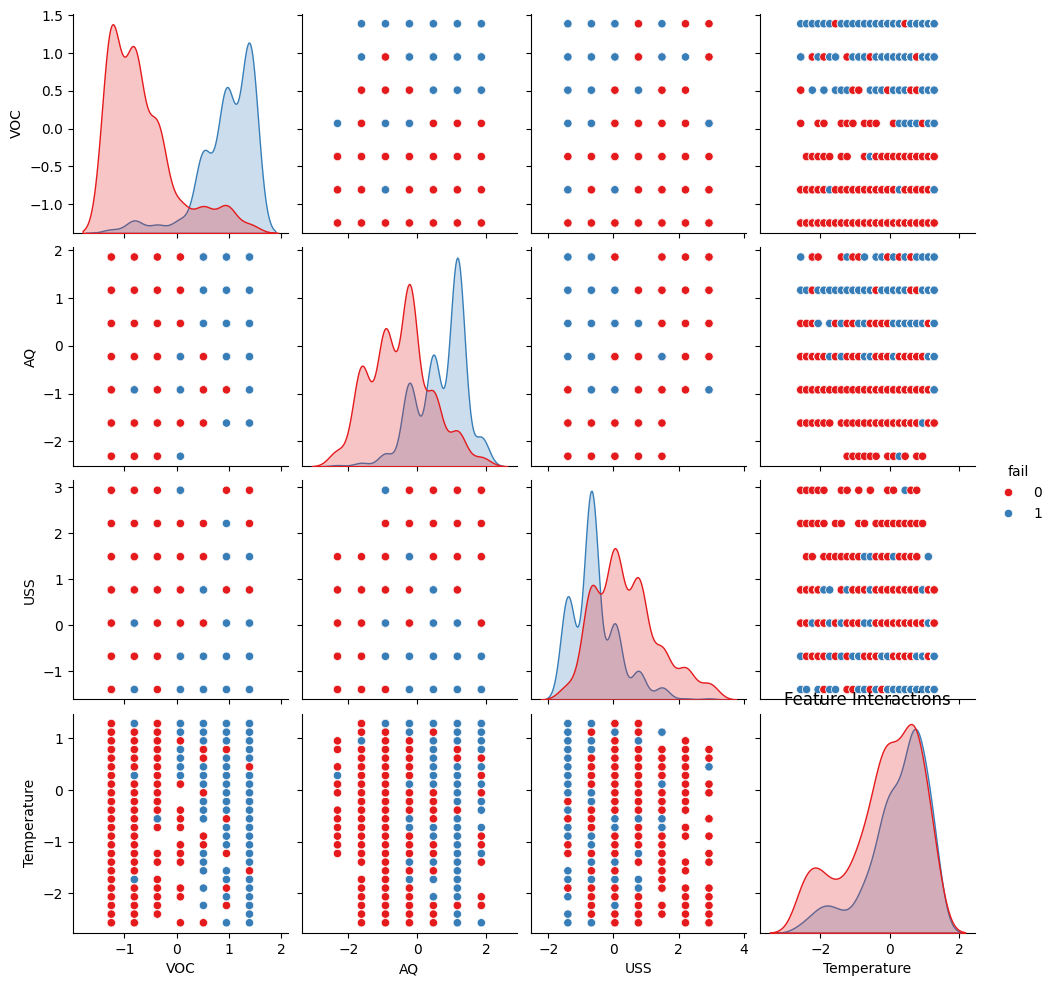

In [ ]:
# Pairplot to visualize feature interactions with 'fail'
sns.pairplot(data[['VOC', 'AQ', 'USS', 'Temperature', 'fail']], hue='fail', palette="Set1")
plt.title("Feature Interactions")
plt.show()


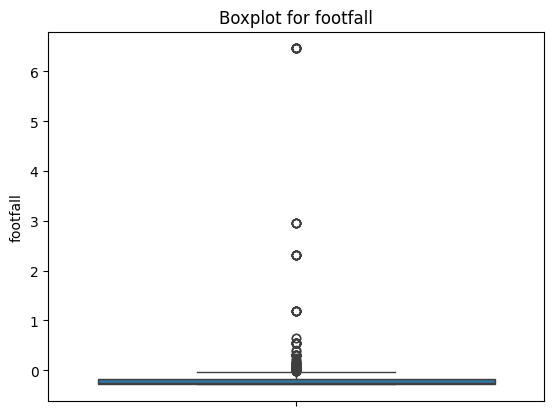

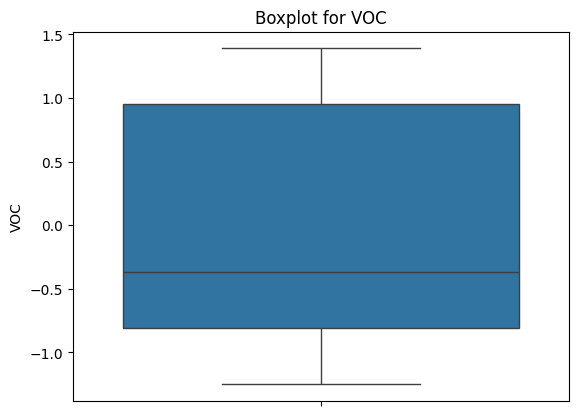

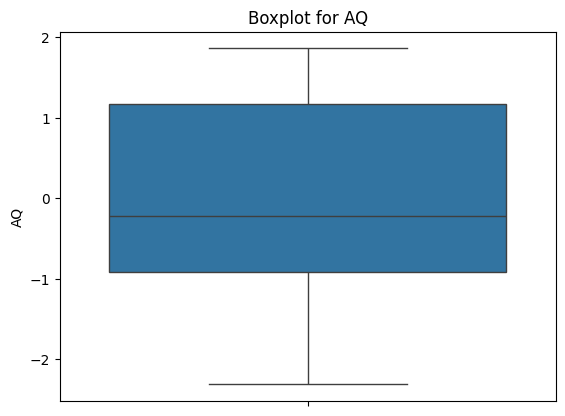

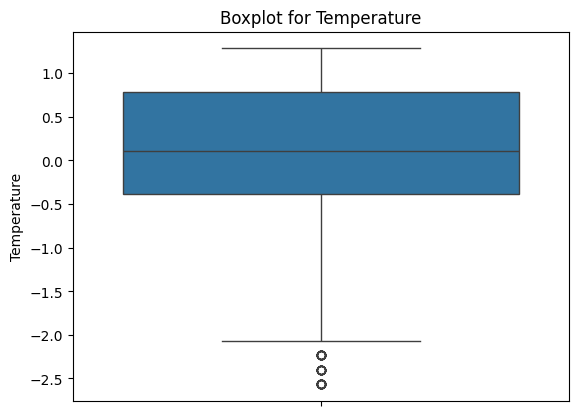

In [ ]:
# Boxplot to detect outliers
features_to_check = ['footfall', 'VOC', 'AQ', 'Temperature']
for feature in features_to_check:
    sns.boxplot(data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
# Create an Environmental Risk Index
data['Env_Risk_Index'] = data['VOC'] * data['AQ']
print(data[['VOC', 'AQ', 'Env_Risk_Index']].head())


        VOC        AQ  Env_Risk_Index
0  1.389813  1.860497        2.585742
1 -0.810763 -0.921775        0.747341
2 -0.810763 -1.617343        1.311282
3 -0.810763 -0.921775        0.747341
4 -1.250878  0.469361       -0.587113


In [ ]:
# Binary feature indicating high VOC levels
data['High_VOC'] = (data['VOC'] > data['VOC'].quantile(0.75)).astype(int)
print(data[['VOC', 'High_VOC']].head())


        VOC  High_VOC
0  1.389813         1
1 -0.810763         0
2 -0.810763         0
3 -0.810763         0
4 -1.250878         0


In [ ]:
# Add lagged features for VOC and AQ
data['VOC_Lag1'] = data['VOC'].shift(1)
data['AQ_Lag1'] = data['AQ'].shift(1)
data.dropna(inplace=True)  # Remove rows with NaN values due to lagging


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define X and y
X = data.drop(columns=['fail'])
y = data['fail']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

# Evaluate
y_pred = xgb_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       109
           1       0.84      0.91      0.87        80

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189

Confusion Matrix:
 [[95 14]
 [ 7 73]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Grid search for XGBoost
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_sm, y_train_sm)

# Best parameters
print("Best Parameters:\n", grid_search.best_params_)


Best Parameters:
 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation
cv_scores = cross_val_score(xgb_model, X_train_sm, y_train_sm, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))


Cross-Validation F1 Scores: [0.85714286 0.94252874 0.92045455 0.90909091 0.94054054]
Mean F1 Score: 0.9139515175722073


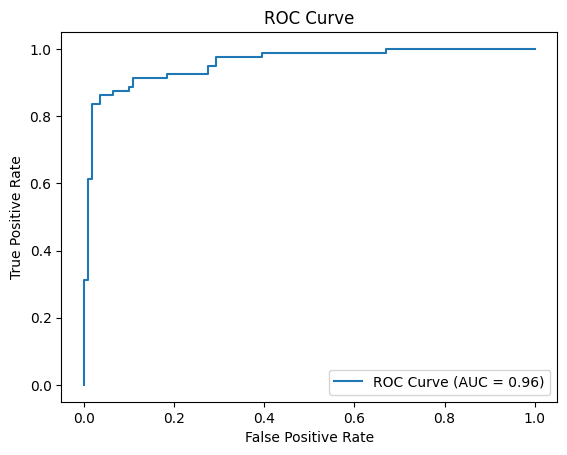

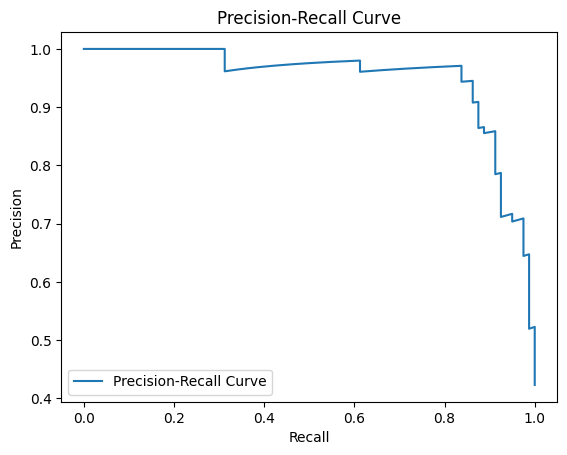

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC Curve
y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure()
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(random_state=42, contamination=0.1)
data['Anomaly'] = iso_forest.fit_predict(data[features_to_scale])
print(data['Anomaly'].value_counts())


Anomaly
 1    848
-1     95
Name: count, dtype: int64


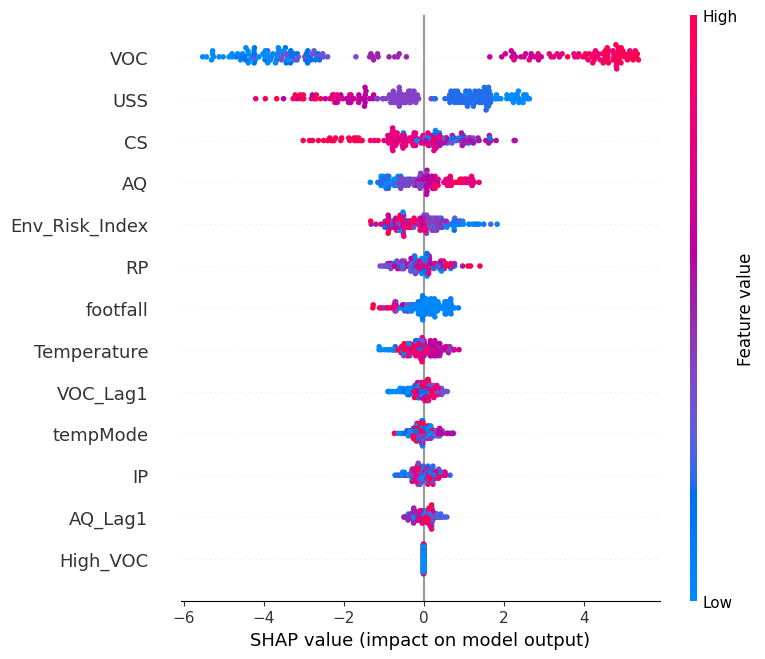

In [ ]:
import shap

# SHAP values for XGBoost
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
# Save the model
import pickle
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))
"""
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)
model = pickle.load(open('xgb_model.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame(data)
    prediction = model.predict(df).tolist()
    return jsonify(prediction)

if __name__ == '__main__':
    app.run()
"""


"\nfrom flask import Flask, request, jsonify\nimport pickle\nimport pandas as pd\n\napp = Flask(__name__)\nmodel = pickle.load(open('xgb_model.pkl', 'rb'))\n\n@app.route('/predict', methods=['POST'])\ndef predict():\n    data = request.get_json()\n    df = pd.DataFrame(data)\n    prediction = model.predict(df).tolist()\n    return jsonify(prediction)\n\nif __name__ == '__main__':\n    app.run()\n"

In [ ]:
import plotly.express as px

# Example: Distribution of VOC
fig = px.histogram(data, x='VOC', color='fail', barmode='overlay', title="VOC Distribution by Failure Status")
fig.show()


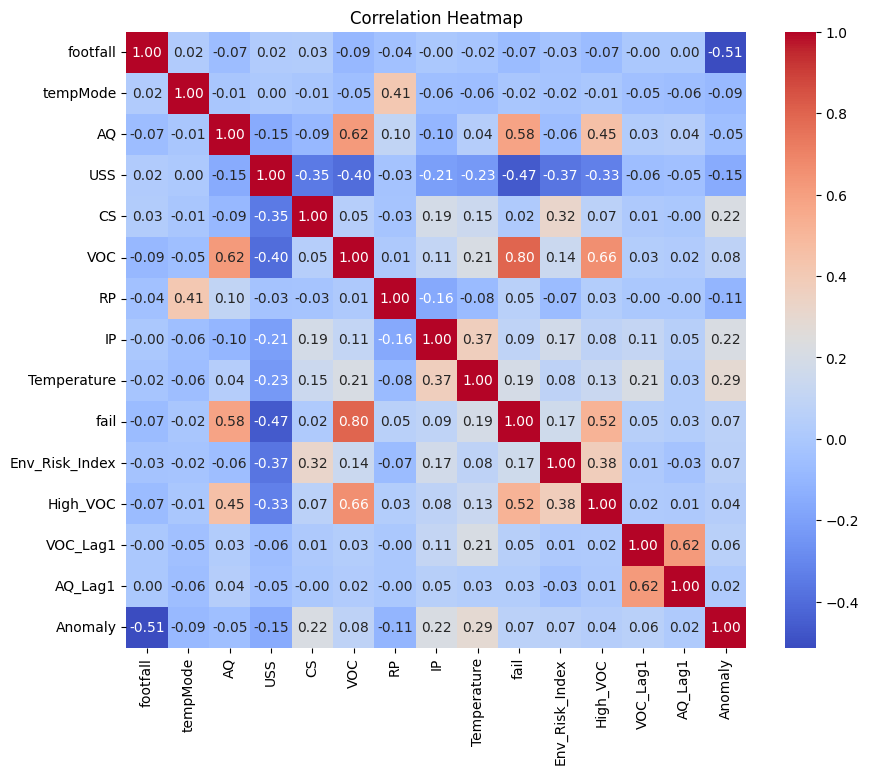

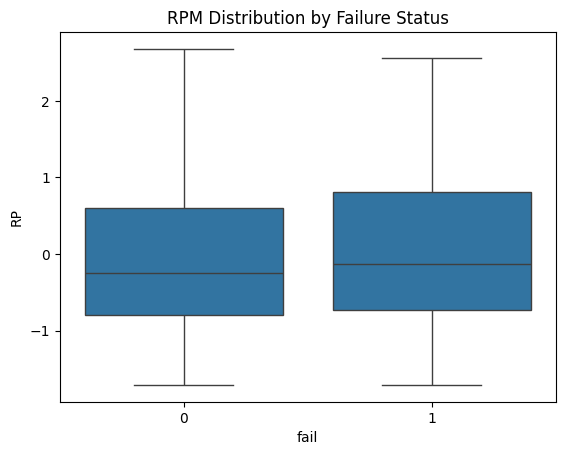

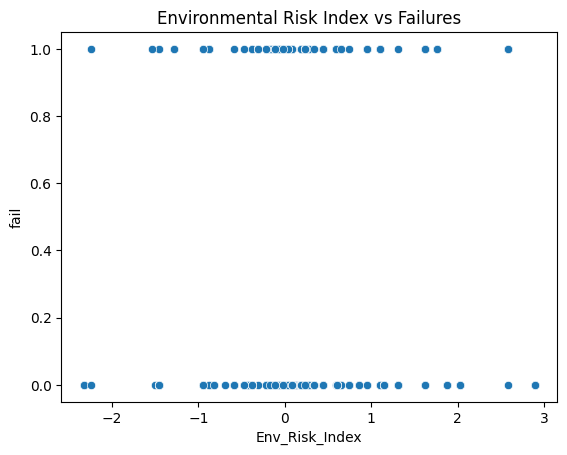

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Failures by RPM
sns.boxplot(x='fail', y='RP', data=data)
plt.title("RPM Distribution by Failure Status")
plt.show()

# Scatterplot of Environmental Risk vs Failures
sns.scatterplot(x='Env_Risk_Index', y='fail', data=data)
plt.title("Environmental Risk Index vs Failures")
plt.show()
